In [72]:
#importing libraries and reading the image
import numpy as np
import cv2 
from matplotlib import pyplot as plt
img = cv.imread('imgnoi.jpg')
img = cv.resize(img, (1500,1920))


In [73]:
# I imported the image 'imgnoi.jpg' which is denoised using denoise_nl_means, skimage and performed canny detection to that image and then used it to perform Hough transformation.

In [74]:
med = np.median(img)
low = int(max(0, 0.7*med))
up = int(min(255,1.3*med))

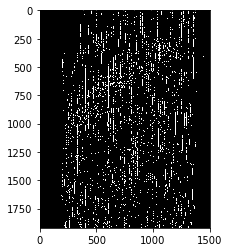

In [75]:
edges = cv2.Canny(img,low+100,up+100)  # Applying Canny detection
plt.imshow(edges,cmap='gray')

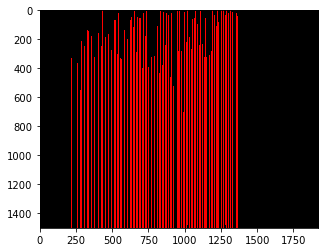

In [76]:
rho = 1
theta = 3*np.pi/180
threshold = 250
min_line_length = 20
max_line_gap = 1920

# Run Hough on the edge-detected image 
lines = cv2.HoughLinesP(edges, rho,theta, threshold, np.array([]), min_line_length, max_line_gap)
blank_image2 = np.zeros(shape = [1500,1920,3], dtype = np.uint8)  # creating a blank_image to draw lines on 

# Iterate over the output "lines" and draw lines on the blank_image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(blank_image2, (x1,y1), (x2,y2), [255,0,0], 2)
        
plt.imshow(blank_image2, cmap = 'gray')  

In [77]:
len(lines)

300

In [78]:
# Since many lines are overlapping on each other, I used 2 units as thickness of sheet (or) the dustance between two lines.

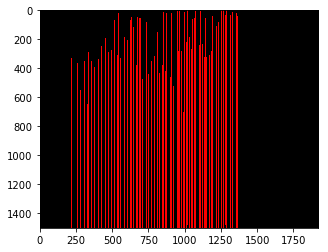

In [79]:
rho = 1
theta = 3*np.pi/180
threshold = 250
min_line_length = 20
max_line_gap = 1920

# Run Hough on the edge-detected image 
lines = cv2.HoughLinesP(edges, rho,theta, threshold, np.array([]), min_line_length, max_line_gap)
blank_image2 = np.zeros(shape = [1500,1920,3], dtype = np.uint8)    # creating a blank_image to draw lines on 
lines = lines.reshape((-1,4))
lines = lines[lines[:,0].argsort()]   # sorting the lines
perfectLines = []
prevx1 = 0

# Iterate over the output "lines" and draw lines on the blank_image
for x1,y1,x2,y2 in lines:
    if x1 > (prevx1+2):      # assuming the thickness of sheet is 2 units
        cv2.line(blank_image2, (x1,y1), (x2,y2), [255,0,0], 2)
        prevx1 = x1
        perfectLines.append(x1)
plt.imshow(blank_image2, cmap = 'gray')   

In [80]:
print('Number of lines which are two units apart are',len(perfectLines))

Number of lines which are two units apart are 169
